In [34]:
# import numpy for array manipulations
import numpy as np

# Load sklearn datasets
from sklearn.datasets import load_iris

# Laod tree module
from sklearn import tree

# load iris dataset
iris = load_iris()

In [39]:
# features
features = iris.feature_names
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
# Feature matrix
X = iris.data

In [42]:
# Display 3 instances/examples
print(X[[1, 50, 145]])

[[ 4.9  3.   1.4  0.2]
 [ 7.   3.2  4.7  1.4]
 [ 6.7  3.   5.2  2.3]]


In [57]:
# remove comment below if you want to see the entire matrix X
# print(X)

In [43]:
# Target labels
# y is already in numeric form, no need for extra data transformation
y = iris.target

In [44]:
# Display 3 labels
print(y[[1,50,145]])

[0 1 2]


In [45]:
# Display the names of 1, 50 and 145 ith examples
names = iris.target_names
for i in y[[1,50,145]]:
    print(names[i])

setosa
versicolor
virginica


In [55]:
# Display the entire vector y
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
# split data
# leave 2 examples from each specie 
test_idx = [0,1, 50,51, 100,101]

# training data (without the idx 0,1,50,51,100,101)
train_target = np.delete(y, test_idx)
train_data = np.delete(X, test_idx, axis=0)

# testing data
test_target = y[test_idx]
test_data = X[test_idx]

In [ ]:
# Decision Tree Classifier
# Here we are initializing using the default parameters
clf = tree.DecisionTreeClassifier()

# Model Training
# In sk-learn we train a algorithm using the fit method and passing
# feature matrix (X) and output labels (Y)
clf.fit(train_data, train_target)

In [53]:
# predict new instances (here we are using the test data)
y_pred = clf.predict(test_data)

# Display predicted values
print(y_pred)

[0 0 1 1 2 2]


In [54]:
# Display the true values 
print(test_target)

[0 0 1 1 2 2]


***NOTE:*** Actually our algorithms is scoring well
There are better and simple ways to evaluate classification algorithms
which we are going to see on upcoming articles

In [61]:
# Visualize the Decision Tree
# Code from http://scikit-learn.org/stable/modules/tree.html
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris.pdf") 

True

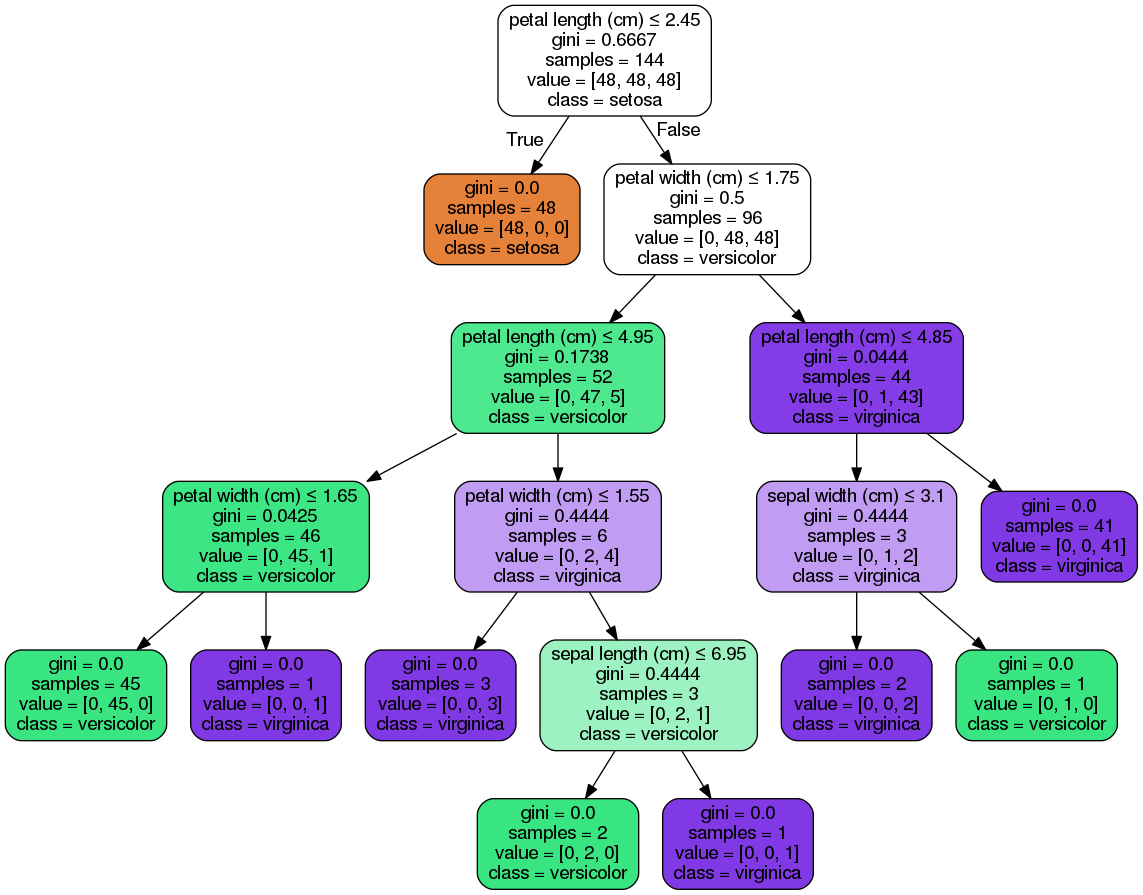

In [62]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 